<h1 align="center">Estructura de Datos y Algoritmos II</h1>
<h1 align="center">Algoritmos Avanzados</h1>
<h1 align="center">Aprendizaje Automático - Regresión y Clasificación</h1>
<h1 align="center">2024</h1>
<h1 align="center">MEDELLÍN - COLOMBIA </h1>

*** 
|[![Outlook](https://img.shields.io/badge/Microsoft_Outlook-0078D4?style=plastic&logo=microsoft-outlook&logoColor=white)](mailto:calvar52@eafit.edu.co)||[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/S08_AlgoritmosAvanzados_ML_ClasificacionRegresion.ipynb)
|-:|:-|--:|
|[![LinkedIn](https://img.shields.io/badge/linkedin-%230077B5.svg?style=plastic&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/carlosalvarez5/)|[![@alvarezhenao](https://img.shields.io/twitter/url/https/twitter.com/alvarezhenao.svg?style=social&label=Follow%20%40alvarezhenao)](https://twitter.com/alvarezhenao)|[![@carlosalvarezh](https://img.shields.io/badge/github-%23121011.svg?style=plastic&logo=github&logoColor=white)](https://github.com/carlosalvarezh)|

<table>
 <tr align=left><td><img align=left src="https://github.com/carlosalvarezh/Curso_CEC_EAFIT/blob/main/images/CCLogoColorPop1.gif?raw=true" width="25">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license.(c) Carlos Alberto Alvarez Henao</td>
</table>

***

## Introducción

Recordemos, del capítulo anterior, los tipos de Aprendizaje Automático que se tienen:

<p float="center">
  <img src="https://github.com/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/images/ML04.png?raw=true" width="500" />
</p>

- ***Aprendizaje Supervisado:*** Involucra modelos que aprenden a partir de un conjunto de datos etiquetados. El objetivo es aprender una función que mapee las entradas a salidas deseadas. Ejemplos incluyen clasificación (e.g., distinguir entre correos electrónicos spam y no spam) y regresión (e.g., predecir precios de viviendas).
<p>&nbsp;</p>

- ***Aprendizaje No Supervisado:*** Se usa con datos que no están etiquetados. El sistema intenta aprender la estructura de los datos sin ninguna etiqueta, a menudo a través de la identificación de patrones. Ejemplos comunes son el clustering (e.g., segmentación de clientes) y la reducción de dimensionalidad.
<p>&nbsp;</p>

- ***Aprendizaje Semi-supervisado:*** Combina ambos métodos anteriores. Utiliza una pequeña cantidad de datos etiquetados y una gran cantidad de datos no etiquetados. Es útil cuando las etiquetas son costosas de obtener.
<p>&nbsp;</p>

- ***Aprendizaje por Refuerzo:*** En este tipo, los algoritmos aprenden a tomar decisiones realizando acciones en un entorno para maximizar alguna noción de recompensa acumulativa. Ejemplos incluyen juegos (e.g., ajedrez, Go) y navegación de robots.

En este capítulo nos centraremos exclusivamente en revisar algunos de los algoritmos más ampliamente empleados en el Aprendizaje Supervisado, que incluye algoritmos de Clasificación y de Regresión.

## Regresión

 ### Introducción

La [regresión](https://en.wikipedia.org/wiki/Regression_analysis) en el aprendizaje automático es una técnica esencial que permite a los científicos de datos predecir y entender las relaciones complejas entre variables. Al centrarse en predecir valores continuos, se diferencia de los modelos de [clasificación](https://en.wikipedia.org/wiki/Statistical_classification), que predicen categorías discretas. Los tipos más comunes de regresión incluyen la [regresión lineal](https://en.wikipedia.org/wiki/Linear_regression), tanto simple como múltiple, que se basan en el ajuste de una línea o plano a los datos para predecir la variable dependiente a partir de una o más variables independientes.

Aparte de la regresión lineal, existen técnicas avanzadas como la [regresión polinómica](https://en.wikipedia.org/wiki/Polynomial_regression), que modela relaciones no lineales, y métodos de regularización como la regresión de cresta y [Lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)), que son efectivos para manejar la multicolinealidad y evitar el sobreajuste. Además, existen enfoques no paramétricos, como los [árboles de decisión](https://en.wikipedia.org/wiki/Decision_tree) y los [Random forest](https://en.wikipedia.org/wiki/Random_forest), que ofrecen mayor flexibilidad en la modelización de relaciones complejas. La elección del modelo adecuado depende de varios factores, incluyendo la naturaleza de los datos y el problema específico a resolver. La evaluación del modelo, un paso crucial en cualquier análisis de regresión, se realiza a través de métricas como el error cuadrático medio y el coeficiente de determinación.

El núcleo de cualquier problema de regresión es la relación entre:

1. **Variable Independiente (Predictora):** Estas son las variables de entrada que se utilizan para hacer las predicciones.
<p>&nbsp;</p>

2. **Variable Dependiente (Objetivo):** Es el resultado que intentamos predecir o estimar.

En la regresión, buscamos una función que mapee de la mejor manera las variables independientes con la dependiente.

### Acercamiento al problema de regresión

Supongamos que estamos trabajando con tres puntos específicos: $[1,2]$, $[2,3]$, y $[3,3.5]$. ¿Podríamos identificar una recta que se ajuste de la mejor manera posible a estos puntos? En otras palabras, ¿existe una recta única que pase exactamente por todos ellos? Y si no, ¿hay alguna recta que se destaque como la "mejor" entre todas las posibles?

Si estos puntos estuvieran perfectamente alineados, una única recta los intersectaría a todos. Sin embargo, una observación detallada revela que no están colineales. Esto implica que, aunque para cada par de puntos podemos trazar una recta específica, resultando en tres rectas diferentes para nuestros tres puntos, ninguna de ellas será la solución perfecta. Este escenario se evidencia claramente en la representación gráfica de estas rectas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([1, 2, 3])
y = np.array([2, 3, 3.5])

# Ecuaciones de las rectas
def recta_roja(x):
    return x + 1

def recta_verde(x):
    return 0.5 * x + 2

# Extender el rango de X para las líneas roja y verde
x_roja_extendida = np.linspace(1, 3, 100)
x_verde_extendida = np.linspace(1, 3, 100)

# Calcular Y para las líneas extendidas
y_roja_extendida = recta_roja(x_roja_extendida)
y_verde_extendida = recta_verde(x_verde_extendida)

# Plot the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Dibujar y extender las líneas
plt.plot(x_roja_extendida, y_roja_extendida, color='red', label='Line 1')
plt.plot(x_verde_extendida, y_verde_extendida, color='green', label='Line 2')
plt.plot([x[0], x[2]], [y[0], y[2]], color='orange', label='Line 3')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


Cada recta que consideramos posee una pendiente ($m$) y un punto de intersección con el eje $y$ ($b$) únicos. Al explorar las diversas combinaciones posibles de $m$ y $b$, buscamos de manera visual e intuitiva aquella recta que mejor se ajuste a nuestros puntos, es decir, la que minimice la suma de las distancias perpendiculares entre la recta y cada uno de los puntos. Para facilitar este proceso, hemos desarrollado un [widget](https://ipywidgets.readthedocs.io/en/7.x/) interactivo. Este permite ajustar los valores de $m$ y $b$ y, simultáneamente, observar el impacto de estos ajustes en la alineación de la recta con respecto a los puntos de datos. No solo muestra las distancias individuales de cada punto a la recta, sino también la suma total de estas distancias, proporcionando una comprensión más clara de la calidad del ajuste de la recta a los datos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Data points
x = np.array([1, 2, 3])
y = np.array([2, 3, 3.5])

# Función para calcular la distancia de un punto a una recta
def distance_from_line(point_x, point_y, m, b):
    return abs(m * point_x - point_y + b) / np.sqrt(m**2 + 1)

# Función para dibujar la recta, los puntos y calcular la suma de distancias
def plot_line_and_distances(m, b):
    plt.figure(figsize=(8, 6))

    # Dibujar los puntos originales
    plt.scatter(x, y, color='blue', label='Data Points')
    
    # Crear una línea con la pendiente y la intersección dados
    x_vals = np.linspace(0, 4, 100)
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, color='red', label=f'y = {m}x + {b}')

    # Calcular y mostrar las distancias
    total_distance = 0
    for i, (xi, yi) in enumerate(zip(x, y)):
        dist = distance_from_line(xi, yi, m, b)
        total_distance += dist
        plt.plot([xi, xi], [yi, m*xi+b], color='green', linestyle='--')
        plt.text(xi, (yi + m*xi+b)/2, f'{dist:.2f}', color='green')

    # Mostrar la suma total de las distancias
    plt.title(f'Suma total de distancias: {total_distance:.2f}')

    # Configuración del gráfico
    plt.xlim(0, 4)
    plt.ylim(0, 5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.legend()
    plt.show()

# Crear el widget interactivo
interactive_plot = interactive(plot_line_and_distances, m=(-2.0, 2.0, 0.01), b=(0, 5, 0.01))
interactive_plot


Realizar este proceso de forma "manual" resulta no solo tedioso sino también impreciso. Para abordar esta tarea de manera más eficiente y exacta, recurriremos a una técnica matemática conocida como *Regresión Lineal Simple*, también denominada [*OLS*](https://en.wikipedia.org/wiki/Ordinary_least_squares) por sus siglas en inglés (*Ordinary Least Squares*). Esta metodología se basa en encontrar la línea que minimiza la suma de los cuadrados de las diferencias (*errores*) entre los valores observados y los valores predichos por la recta, proporcionando así un ajuste óptimo y matemáticamente fundamentado a los puntos de datos.

### Regresión Lineal Simple

La [regresión lineal](https://en.wikipedia.org/wiki/Linear_regression) es una técnica estadística que busca modelar la relación entre una variable dependiente (también conocida como variable de respuesta) y una o más variables independientes (también conocidas como predictores o covariables) a través de una ecuación lineal. La forma más simple de regresión lineal se llama *regresión lineal simple*, donde hay una sola variable independiente. Cuando hay más de una variable independiente, se habla de *regresión lineal múltiple*.

#### Aspectos matemáticos de la Regresión Lineal Simple

La ecuación básica para un modelo de regresión lineal simple es:

$$y=\beta_0+\beta_1 \cdot x + \varepsilon$$

donde:

- $y$ es la variable dependiente a predecir.
- $x$ son las variables predictoras.
- $\beta_0$ es la intersección (ordenada al origen) con el eje $y$
- $\beta_1$ es la pendiente de la línea de regresión.
- $\varepsilon$ es el término de error

El objetivo principal es encontrar los valores de $\beta_0$ y $\beta_1$ que minimicen el error total (sumatoria de los errores al cuadrado) entre los valores reales de $y$ y los valores predichos por el modelo.

***Nota:*** Cabe destacar que la ecuación utilizada aquí es idéntica a la ecuación clásica de una línea recta, expresada como $y = b + mx$. Esta forma se aplica típicamente cuando solo contamos con dos puntos, a través de los cuales pasa una única recta. Sin embargo, la ecuación del modelo de regresión lineal cobra especial relevancia cuando manejamos más de dos puntos. En este contexto, la regresión no busca una línea que pase exactamente por todos los puntos, sino una que minimice la distancia global entre la línea y cada uno de los puntos, ofreciendo así una representación más precisa y útil en situaciones donde los datos no siguen una línea perfecta.

#### Minimización del error

Para lograr esto, utilizamos el método de [mínimos cuadrados](https://en.wikipedia.org/wiki/Least_squares). Este método busca encontrar los valores de  $\beta_0$ y $\beta_1$ que minimicen la suma de los cuadrados de las diferencias entre los valores observados ("reales") y los valores predichos. Matemáticamente, esto se representa como:


$$\text{Minimizar} \sum_{i=1}^n\left(y_i - \beta_1 x_i -\beta_0\right)^2$$

donde $n$ es el número de observaciones. Esta suma de cuadrados es a menudo llamada "*suma de los residuales al cuadrado*".

Cuando ajustamos los valores de $\beta_0$ y $\beta_1$, estamos esencialmente moviendo y rotando la línea de regresión en el gráfico para encontrar la posición que minimiza el error. Si ajustamos estos parámetros de manera correcta, la línea de regresión pasará lo más cerca posible de los puntos reales, y el error (la distancia entre los puntos y la línea) será mínima (como fue realizado de forma manual arriba).

#### Cálculo de los coeficientes estadísticos

Para minimizar la función se toman las derivadas parciales con respecto a $\beta_0$ y $\beta_1$, se igualan a cero y se resuelven para ambas ecuaciones, dando los valores de los coeficientes:

- ***Coeficientes de Regresión:***

Los coeficientes de regresión $\beta_0$ y $\beta_1$ se calculan mediante las siguientes fórmulas:
$$
\begin{aligned}
& \beta_1=\frac{\sum_{i-1}^n\left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)}{\sum_{i-1}^n\left(x_i-\bar{x}\right)^2} \\
\\
& \beta_0=\bar{y}-\beta_1 \cdot \bar{x}
\end{aligned}
$$
Donde:
- $n$ es el número de observaciones.
- $x_i$ y $y_i$ son los valores de la variable independiente e dependiente respectivamente en la observación $i$.
- $\bar{x}$ y $\bar{y}$ son las medias de las variables $x$ e $y$ respectivamente.
<p>&nbsp;</p>

- ***Coeficiente de Determinación $\left(R^2\right)$:***

El coeficiente de determinación $R^2$ mide la proporción de la variabilidad total en la variable dependiente que es explicada por la regresión. Se calcula así:

$$R^2=\frac{S S R}{S S T}$$

- $S S R$ es la suma de los cuadrados de la regresión.
- $S S T$ es la suma total de los cuadrados.
<p>&nbsp;</p>

- ***Error Estándar de Estimación (SEE):***

EI SEE es una medida de cuánto difieren los valores reales de la variable dependiente de los valores predichos por el modelo. Se calcula como:

$$S E E=\sqrt{\frac{\sum_{i=1}^n\left(y_i-\bar{y}_i\right)^2}{n-2}}$$

Donde:
- $y_i$ son los valores reales de la variable dependiente.
- $\bar{y}_i$ son los valores predichos por el modelo.

#### Indicadores de bondad de ajuste

Para evaluar la calidad del modelo de regresión lineal, utilizamos varios indicadores:

- ***Coeficiente de Determinación ($R^2$):*** Mide la proporción de la variabilidad de la variable dependiente que es explicada por el modelo. $R^2$ varía entre $0$ y $1$, siendo $1$ indicativo de una perfecta predicción.
<p>&nbsp;</p>

- ***Error Estándar Residual (RSE):*** Estima la dispersión de los residuos (diferencias entre los valores reales y los predichos).
<p>&nbsp;</p>

- ***$p$-valor:*** Determina la significancia estadística de los coeficientes. Valores pequeños indican que la variable es relevante en el modelo.
<p>&nbsp;</p>

- ***Intervalos de Confianza para los Coeficientes:*** Ayudan a establecer el rango probable de valores para los coeficientes.

#### Implementación en Python

Vamos a explorar la implementación de un modelo de regresión lineal utilizando Python y su ecosistema de bibliotecas.

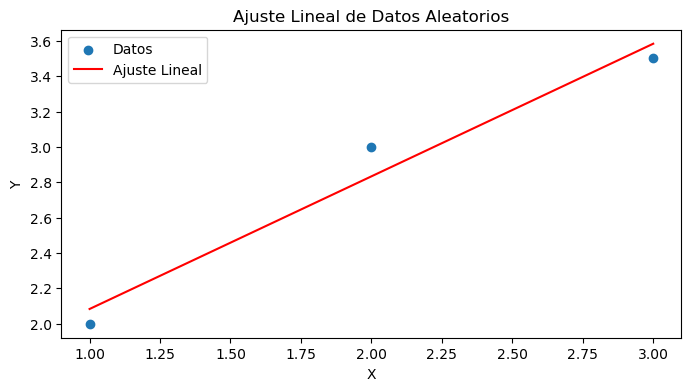

Pendiente (m): 0.75
Intercepto (c): 1.3333333333333335
RMSE: 0.2041241452319315
Coeficiente de Determinación (R^2): 0.9642857142857144


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# datos del ejemplo
x = np.array([1, 2, 3])
y = np.array([2, 3, 3.5])

beta1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
beta0 = np.mean(y) - beta1 * np.mean(x)

y_pred = beta0 + beta1 * x

R2 = np.sum((y_pred - np.mean(y))**2) / np.sum((y - np.mean(y))**2)
SEE = np.sqrt(np.sum((y - y_pred)**2) / (len(x) - 2))

# Graficar los datos y la recta de ajuste
plt.figure(figsize=(8, 4))
plt.scatter(x, y, label='Datos')
plt.plot(x, beta1*x + beta0, 'r', label='Ajuste Lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Ajuste Lineal de Datos Aleatorios')
plt.show()

# Imprimir resultados
print("Pendiente (m):", beta1)
print("Intercepto (c):", beta0)
print("RMSE:", SEE)
print("Coeficiente de Determinación (R^2):", R2)


Obsérvese que se obtuvieron resultados similares, sin realizar el procedimiento ensayo-error, y con una formulación matemática más robusta.

Ahora, avancemos con otro ejemplo, esta vez utilizando un conjunto de datos más amplio. Para ello, generaremos valores de manera aleatoria, también conocidos como "[datos sintéticos](https://en.wikipedia.org/wiki/Synthetic_data)", con el objetivo de contar con una gran cantidad de datos que sigan una tendencia lineal. En nuestro próximo ejemplo, utilizaremos una ecuación de recta predefinida, a la cual añadiremos cierto grado de "ruido" aleatorio. Este ruido asegura que los datos no sean colineales perfectamente y que exista un margen de error, imitando de manera más realista las condiciones que a menudo encontramos en datos del mundo real. Este enfoque nos permite observar cómo las técnicas de regresión lineal se aplican y se ajustan en situaciones con variabilidad y ruido en los datos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de datos aleatorios
np.random.seed(0)
x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.normal(0, 1, 20)

beta1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
beta0 = np.mean(y) - beta1 * np.mean(x)

y_pred = beta0 + beta1 * x

R2 = np.sum((y_pred - np.mean(y))**2) / np.sum((y - np.mean(y))**2)
SEE = np.sqrt(np.sum((y - y_pred)**2) / (len(x) - 2))

"""
# Cálculo de los parámetros del ajuste lineal
# empleando conceptos de Algebra Lineal para su solución
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
# Estadísticas del ajuste
residuals = y - (m*x + c)
rmse = np.sqrt(np.mean(residuals**2))
r_squared = 1 - (np.sum(residuals**2) / np.sum((y - np.mean(y))**2))
"""


# Graficar los datos y la recta de ajuste
plt.figure(figsize=(8, 4))
plt.scatter(x, y, label='Datos')
plt.plot(x, beta1*x + beta0, 'r', label='Ajuste Lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Ajuste Lineal de Datos Aleatorios')
plt.show()

# Imprimir resultados
print("Pendiente (m):", beta1)
print("Intercepto (c):", beta0)
print("RMSE:", SEE)
print("Coeficiente de Determinación (R^2):", R2)


#### Análisis de resultados

Tanto el Coeficiente de Determinación $R^2$, como el *Root Mean Square Error* (*RMSE*) varían entre $0$ y $1$ en su escala.

- $R^2$ varía entre $0$ y $1$. Un valor de $0$ significa que el modelo no explica nada de la variabilidad en los datos, mientras que un valor de $1$ significa que el modelo explica toda la variabilidad en los datos.
<p>&nbsp;</p>

- El *RMSE* es siempre un número positivo y varía en magnitud. No se mide en una escala de $0$ a $1$ como el $R^2$. Cuanto más pequeño sea el valor del *RMSE*, más cercano será el ajuste del modelo a los datos reales. Un *RMSE* de $0$ indicaría que el modelo encaja perfectamente con los datos observados, lo cual es poco probable en la mayoría de los casos.

#### Ejemplo: Cuarteto de Anscombe

El [Cuarteto de Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) es un conjunto de cuatro conjuntos de datos que tienen propiedades estadísticas muy similares, pero visualmente distintas. Fue presentado por el estadístico *Francis Anscombe* en 1973 como una poderosa demostración de la importancia de visualizar los datos antes de realizar análisis y tomar decisiones basadas en ellos. Cada conjunto de datos tiene 11 observaciones (puntos), lo que lo convierte en un ejemplo convincente para ilustrar cómo los resultados pueden ser engañosos si solo se confía en estadísticas descriptivas.

|  x1   |  y1   |$|$|  x2   |  y2   |$|$| x3   |  y3   |$|$| x4   |  y4   |
|-------|-------|-  |-------|-------|-  |------|-------|-  |------|-------|
| 10.0  |  8.04 |$|$| 10.0  |  9.14 |$|$|10.0  |  7.46 |$|$| 8.0  |  6.58 |
|  8.0  |  6.95 |$|$|  8.0  |  8.14 |$|$| 8.0  |  6.77 |$|$| 8.0  |  5.76 |
| 13.0  |  7.58 |$|$| 13.0  |  8.74 |$|$|13.0  | 12.74 |$|$| 8.0  |  7.71 |
|  9.0  |  8.81 |$|$|  9.0  |  8.77 |$|$| 9.0  |  7.11 |$|$| 8.0  |  8.84 |
| 11.0  |  8.33 |$|$| 11.0  |  9.26 |$|$|11.0  |  7.81 |$|$| 8.0  |  8.47 |
| 14.0  |  9.96 |$|$| 14.0  |  8.10 |$|$|14.0  |  8.84 |$|$| 8.0  |  7.04 |
|  6.0  |  7.24 |$|$|  6.0  |  6.13 |$|$| 6.0  |  6.08 |$|$| 8.0  |  5.25 |
|  4.0  |  4.26 |$|$|  4.0  |  3.10 |$|$| 4.0  |  5.39 |$|$|19.0  | 12.50 |
| 12.0  | 10.84 |$|$| 12.0  |  9.13 |$|$|12.0  |  8.15 |$|$| 8.0  |  5.56 |
|  7.0  |  4.82 |$|$|  7.0  |  7.26 |$|$| 7.0  |  6.42 |$|$| 8.0  |  7.91 |
|  5.0  |  5.68 |$|$|  5.0  |  4.74 |$|$| 5.0  |  5.73 |$|$| 8.0  |  6.89 |

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cuarteto de Anscombe
anscombe_1 = np.array([
    [10.0, 8.04], [8.0, 6.95], [13.0, 7.58],
    [9.0, 8.81], [11.0, 8.33], [14.0, 9.96],
    [6.0, 7.24], [4.0, 4.26], [12.0, 10.84],
    [7.0, 4.82], [5.0, 5.68]
])

anscombe_2 = np.array([
    [10.0, 9.14], [8.0, 8.14], [13.0, 8.74],
    [9.0, 8.77], [11.0, 9.26], [14.0, 8.10],
    [6.0, 6.13], [4.0, 3.10], [12.0, 9.13],
    [7.0, 7.26], [5.0, 4.74]
])

anscombe_3 = np.array([
    [10.0, 7.46], [8.0, 6.77], [13.0, 12.74],
    [9.0, 7.11], [11.0, 7.81], [14.0, 8.84],
    [6.0, 6.08], [4.0, 5.39], [12.0, 8.15],
    [7.0, 6.42], [5.0, 5.73]
])

anscombe_4 = np.array([
    [8.0, 6.58], [8.0, 5.76], [8.0, 7.71],
    [8.0, 8.84], [8.0, 8.47], [8.0, 7.04],
    [8.0, 5.25], [19.0, 12.50], [8.0, 5.56],
    [8.0, 7.91], [8.0, 6.89]
])

anscombe_data = [anscombe_1, anscombe_2, anscombe_3, anscombe_4]
labels = ["Cuarteto 1", "Cuarteto 2", "Cuarteto 3", "Cuarteto 4"]

Calculando los estadísticos de cada conjunto de datos:

In [ ]:
# Estadísticos del conjuntos de datos
for i, data in enumerate(anscombe_data):
    x, y = data[:, 0], data[:, 1]
       
    # Calcular estadísticos
    mean_x, mean_y = np.mean(x), np.mean(y)
    slope, intercept = np.polyfit(x, y, 1)
    correlation = np.corrcoef(x, y)[0, 1]
    
    print(f"\nEstadísticas para {labels[i]}:")
    print(f"Media de X: {mean_x:.2f}")
    print(f"Media de Y: {mean_y:.2f}")
    print(f"Pendiente: {slope:.2f}")
    print(f"Intercepto: {intercept:.2f}")
    print(f"Coeficiente de Correlación: {correlation:.2f}")

¿Qué podemos decir de los resultados de los estadísticos calculados? Tómese su tiempo para pensar y discutirlo, basado en la teoría.

Ahora grafiquemos los datos de donde se obtuvieron dichos resultados:

In [ ]:
# Graficar los conjuntos de datos y calcular estadísticos
for i, data in enumerate(anscombe_data):
    x, y = data[:, 0], data[:, 1]
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(x, y, label=labels[i])
    plt.plot(x, np.polyval(np.polyfit(x, y, 1), x), 'r', label='Línea de Tendencia')
    plt.title(labels[i])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    
plt.tight_layout()
plt.show()

### Ecuación de Regresión Lineal Múltiple

#### Introducción

La Regresión Lineal Múltiple es una técnica fundamental en el campo de la estadística y el análisis de datos. Se trata de una extensión poderosa de la Regresión Lineal Simple, diseñada para abordar situaciones en las que una variable dependiente $Y$ se relaciona con dos o más variables independientes $X_1,X_2,\ldots,X_n$. La principal pregunta que busca responder es cómo estas variables independientes influyen en la variable dependiente y cómo pueden ser utilizadas para predecir su comportamiento.

#### Aspectos matemáticos de la ecuación de regresión lineal múltiple

La ecuación general de la Regresión Lineal Múltiple es:

$$Y=\beta_0+\beta_1 X_1+\beta_2 X_2+\ldots+\beta_n X_n+\varepsilon$$

Aquí:

- $Y$ es la variable dependiente que estamos tratando de predecir o entender.
- $X_1, X_2, \ldots, X_p$ son las variables independientes o predictores.
- $\beta_0$ es el término de intersección o el valor esperado de $Y$ cuando todas las $X$ son cero.
- $\beta_1, \beta_2, \ldots, \beta_n$ son los coeficientes de regresión, que indican cómo cambia $Y$ en respuesta a cambios en las $X$.
- $\varepsilon$ representa el error, que captura la variabilidad no explicada por el modelo.

A medida que se van adicionando más variables, de una $x$ a dos ($x_1$ y $x_2$), ya el problema cambia de *"encontrar la recta que mejor se ajusta a una serie de datos"* (en *2D*), a *encontrar el mejor plano que se ajuste a la nube de puntos tridimensionales* (3D). Y a medida que se añaden más variables, ya estaríamos hablando de hiperplanos en espacios multidimensionales. Cada una de las dimensiones representando una característica de la realidad del fenómeno que los datos representan. Se puede tener una gran cantidad de atributos y, por lo tanto, de dimensiones.

#### Forma vectorial

La forma más práctica de representar esta combinación lineal de variables para cada uno de nuestros datos es empleando la nomenclatura vectorial, es decir, en vez de tener un conjunto de ecuaciones del tipo:

$$y_1=\beta_0+\beta_1x_{11}+\beta_2x_{12}+\beta_3x_{13}+\ldots$$
$$y_2=\beta_0+\beta_1x_{21}+\beta_2x_{22}+\beta_3x_{23}+\ldots$$
$$y_3=\beta_0+\beta_1x_{31}+\beta_2x_{32}+\beta_3x_{33}+\ldots$$
$$\vdots$$

se puede conformar una matriz en la que cada columna representa una característica de los datos de entrada, y las filas representa cada una de las mediciones que se tienen en el conjunto de datos

$$\textbf{X}=\begin{bmatrix} 1 & x_{11} & x_{12} & x_{13} & \ldots \\ 1 & x_{21} & x_{22} & x_{23} & \ldots \\ 1 & x_{31} & x_{32} & x_{33} & \ldots \\ \vdots & \vdots & \vdots & \vdots & \ddots \end{bmatrix}$$

Para cada una de las ecuaciones se tiene la variable $y$, que es la variable a modelar. Juntando todas en un vector, se tiene

$$\textbf{Y}=\begin{bmatrix} y_1 \\ y_2 \\ y_3  \\ \vdots\end{bmatrix}$$

y se puede hacer lo mismo con los factores para generar un vector de parámetros

$$\textbf{B}=\begin{bmatrix} \beta_0 & \beta_1 & \beta_2 & \beta_3 \ldots\end{bmatrix}$$

Con esto, se puede reducir la escitura de una gran cantidad de ecuaciones a una sola ecuación vectorial escrita como

$$\textbf{Y}=\textbf{X}\textbf{B}$$

Esta forma de escribir no es solo estética, sino que nos facilitará la comprensión del algoritmo a programar además de ser mucho más eficiente, ya que los procesadores y GPUs procesan de forma más eficiente sobre este tipo de estructuras.

#### Ecuación Matricial y Mínimos Cuadrados

La ecuación matricial que resume este proceso es:

$$\textbf{B}=\left(\textbf{X}^T \textbf{X}\right)^{-1} \textbf{X}^T Y$$

- $\textbf{X}$ es la matriz de diseño que contiene los valores de las variables independientes para cada observación.
- $\textbf{Y}$ es el vector de valores de la variable dependiente.
- $\textbf{X}^T$ es la matriz transpuesta de $X$.
- $\left(\textbf{X}^T \textbf{X}\right)^{-1}$ es la inversa de la matriz producto $\textbf{X}^T \textbf{X}$.

#### Evaluación de la calidad del ajuste

Una vez que se obtienen los coeficientes $\beta$, es crucial evaluar la calidad del ajuste del modelo. Algunos estadísticos clave son:

- ***Coeficiente de Determinación $\left(R^2\right)$ :*** Mide la proporción de la variabilidad total en 
$\textbf{Y}$ explicada por el modelo. Varía entre $0$ (ninguna explicación) y $1$ (explicación completa).
<p>&nbsp;</p>

- ***Error Estándar Residual (RMSE o $\sigma$ ):*** Representa la desviación estándar de los residuos. Un RMSE más bajo indica un mejor ajuste.
<p>&nbsp;</p>

- ***Estadístico F y Prueba t:*** Evalúan la significancia del modelo y de $\sigma_z$ coeficientes individuales.

#### Ejemplo: Casas de Boston

##### Descripción del Problema

En este ejemplo, utilizaremos el conjunto de datos de las casas de Boston, que contiene información sobre diferentes atributos de viviendas en Boston y sus respectivos valores medios. El objetivo es predecir el valor medio de las viviendas ($\textbf{Y}$) utilizando cuatro variables independientes: tasa de criminalidad ($\texttt{CRIM}$), cantidad promedio de habitaciones por vivienda ($\texttt{RM}$), proporción de viviendas ocupadas por sus propietarios construidas antes de 1940 ($\texttt{AGE}$) y tasa de impuesto a la propiedad ($\texttt{TAX}$).

##### Ruta de Solución

- ***Carga de Datos:*** Se carga el conjunto de datos de las casas de Boston utilizando la función `load_boston` de [`sklearn.datasets`](https://scikit-learn.org/stable/datasets.html). Luego, se crea un DataFrame data para almacenar los atributos y el vector target para almacenar los valores medios de las viviendas.
<p>&nbsp;</p>

- ***Selección de Variables:*** Se eligen cuatro variables independientes específicas para este ejemplo: $\texttt{CRIM}$, $\texttt{RM}$, $\texttt{AGE}$ y $\texttt{TAX}$. Estas variables se almacenan en la matriz $\textbf{X}$.
<p>&nbsp;</p>

- ***División de Datos:*** Se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split` de `sklearn.model_selection`. Esto nos permitirá evaluar el rendimiento del modelo en datos no vistos.
<p>&nbsp;</p>

- ***Creación y Ajuste del Modelo:*** Se crea un objeto de regresión lineal utilizando `LinearRegression` de `sklearn.linear_model`. Luego, se ajusta el modelo utilizando los datos de entrenamiento (`X_train` y `y_train`).
<p>&nbsp;</p>

- ***Predicciones y Evaluación:*** Se realizan predicciones en el conjunto de prueba (`X_test`) utilizando el modelo ajustado. Se calculan los estadísticos de calidad del ajuste, como el *Error Estándar Residual (RMSE)* y el *Coeficiente de Determinación* ($R^2$), utilizando las funciones `mean_squared_error` y `r2_score` de `sklearn.metrics`.
<p>&nbsp;</p>

- ***Presentación de Resultados:*** Se presentan los coeficientes de ajuste, el término de intersección, el *RMSE* y el $R^2$ como resultados.

##### Código

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

En vez de la biblioteca de sklearn usaremos la URL directa al dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el conjunto de datos de las casas de Boston desde la URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [ ]:
# Crear un DataFrame con los datos y nombres de columnas
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data_df = pd.DataFrame(data, columns=feature_names)

In [ ]:
data_df.head(10)

In [ ]:
data_df.info()

In [ ]:
data_df.describe()

In [ ]:
# Seleccionar cuatro variables independientes para el ejemplo
selected_features = ['CRIM', 'RM', 'AGE', 'TAX']
X = data_df[selected_features]
X.head(10)

In [ ]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular estadísticos de calidad del ajuste
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Obtener los coeficientes de ajuste
coefficients = model.coef_
intercept = model.intercept_

# Presentar resultados
print("Coeficientes de Ajuste:", coefficients)
print("Término de Intersección:", intercept)
print("Error Estándar Residual (RMSE):", rmse)
print("Coeficiente de Determinación (R^2):", r2)


##### Análisis de resultados

Los coeficientes de ajuste representan cómo cada variable independiente contribuye al valor medio de las viviendas. En este caso:

- El coeficiente de ajuste para $\texttt{CRIM}$ es aproximadamente $-0.1354$. Esto sugiere que, manteniendo las otras variables constantes, un aumento en la tasa de criminalidad está asociado con una disminución de aproximadamente $\$135$ por unidad en el valor medio de las viviendas.
<p>&nbsp;</p>

- El coeficiente de ajuste para $\texttt{RM}$ es aproximadamente $8.138$. Esto indica que, manteniendo las otras variables constantes, un aumento en la cantidad promedio de habitaciones por vivienda está relacionado con un aumento de aproximadamente $\$8,138$ en el valor medio de las viviendas.
<p>&nbsp;</p>

- El coeficiente de ajuste para $\texttt{AGE}$ es aproximadamente $-0.0287$. Esto implica que un aumento en la proporción de viviendas ocupadas por sus propietarios construidas antes de 1940 está asociado con una disminución de aproximadamente $\$28.7$ por unidad en el valor medio de las viviendas.
<p>&nbsp;</p>

- El coeficiente de ajuste para $\texttt{TAX}$ es aproximadamente $-0.0096$. Esto sugiere que un aumento en la tasa de impuesto a la propiedad está asociado con una disminución de aproximadamente $\$9.6$ por unidad en el valor medio de las viviendas.
<p>&nbsp;</p>

- El término de intersección (aproximadamente $-22.2662$) representa el valor esperado de las viviendas cuando todas las variables independientes son cero. Sin embargo, en este contexto, este valor puede no tener una interpretación directa y práctica debido a que muchas de las variables nunca serán iguales a cero en situaciones reales.
<p>&nbsp;</p>

- ***Error Estándar Residual (RMSE):*** El *RMSE* es una medida de la desviación promedio entre los valores reales y las predicciones del modelo. En este caso, el *RMSE* es aproximadamente 6.1324. Esto significa que, en promedio, las predicciones del modelo tienen un error de alrededor de $\$6,132$ en relación con los valores reales de las viviendas. Un *RMSE* más bajo indica un mejor ajuste del modelo a los datos.
<p>&nbsp;</p>

- ***Coeficiente de Determinación ($R^2$):*** El $R^2$ de aproximadamente $0.4872$ indica que alrededor del $48.72\%$ de la variabilidad en los valores medios de las viviendas puede ser explicada por el modelo de regresión lineal múltiple. Esto sugiere que el modelo tiene cierta capacidad para predecir las variaciones en los valores medios de las viviendas, pero no explica la variabilidad en su totalidad.

***Análisis General***

- Los resultados sugieren que el modelo de regresión lineal múltiple tiene cierta capacidad para predecir los valores medios de las viviendas en función de las variables seleccionadas ($\texttt{CRIM}$, $\texttt{RM}$, $\texttt{AGE}$ y $\texttt{TAX}$). Sin embargo, el $R^2$ relativamente bajo y el *RMSE* moderado indican que aún existe una cantidad significativa de variabilidad que el modelo no puede explicar. Esto podría deberse a la falta de consideración de otras variables importantes que influyen en el valor de las viviendas.
<p>&nbsp;</p>

En resumen, mientras que el modelo tiene utilidad predictiva, es importante considerar que hay otros factores que podrían influir en los valores de las viviendas y que no están considerados en este análisis. Sería recomendable explorar más variables y realizar análisis adicionales para mejorar la precisión y capacidad explicativa del modelo.

### Descenso del Gradiente

<p float="center">
  <img src="https://github.com/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/images/Gradient03.gif?raw=true" width="350" />
</p>

#### Introducción

El Método del [Descenso del Gradiente](https://en.wikipedia.org/wiki/Gradient_descent)(*Gradient Descent*), aunque comúnmente considerado una técnica de optimización general, juega un papel crucial en el contexto de la regresión en el aprendizaje automático. Esta metodología se emplea para optimizar los modelos de regresión, ayudando a encontrar los parámetros del modelo que minimizan la función de costo, un paso esencial en la generación de predicciones precisas.

La conexión entre el *Descenso del Gradiente* y la *Regresión* se puede resumir en:

- **Optimización de Modelos de Regresión:** En la regresión, el objetivo es ajustar una línea (en regresión lineal) o una curva (en regresión no lineal) a los datos de manera que se minimice la diferencia entre los valores predichos y los reales. Aquí es donde el descenso del gradiente se vuelve crucial, ayudando a ajustar los parámetros del modelo (como los coeficientes en la regresión lineal) de manera eficiente.
<p>&nbsp;</p>

- **Minimización de la Función de Costo:** La función de costo (como el error cuadrático medio en la regresión lineal) mide qué tan bien el modelo de regresión se ajusta a los datos. El descenso del gradiente busca minimizar esta función de costo ajustando iterativamente los parámetros del modelo.
<p>&nbsp;</p>

- **Ajuste de Parámetros del Modelo:** En cada iteración, el descenso del gradiente ajusta los parámetros en dirección al gradiente negativo de la función de costo. Esto significa que los parámetros se modifican en la dirección que más reduce el error de predicción.

#### ¿Qué es un gradiente?

<p float="center">
  <img src="https://github.com/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/images/Gradient02.PNG?raw=true" width="500" />
</p>

Matemáticamente, el gradiente es un vector que representa la dirección y magnitud del mayor incremento de una función en un punto dado. En otras palabras, el gradiente apunta en la dirección de la mayor pendiente ascendente de la función.

- **Definición del Gradiente:** Para una función $ f(x, y, z, \dots) $ de varias variables, el gradiente de $ f $, denotado como $ \nabla f $ o $ \text{grad} \, f $, es un vector que contiene todas las derivadas parciales de $ f $. Si $ f $ es una función de tres variables $ x $, $ y $, y $ z $, el gradiente de $ f $ es: 
     $$ \nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right) $$
<p>&nbsp;</p>

- **Interpretación Geométrica:** El gradiente en un punto particular ofrece la dirección en la que la función aumenta más rápidamente. La magnitud del gradiente en ese punto da la tasa de aumento más rápida.
<p>&nbsp;</p>

- **El Gradiente y el Descenso Máximo:** Aunque el gradiente apunta en la dirección de la mayor subida, en el método del descenso del gradiente lo utilizamos para movernos en la dirección opuesta. Esto se debe a que buscamos minimizar la función, no maximizarla.

#### El Gradiente en el Descenso del Gradiente

El Descenso del Gradiente es una técnica de optimización para encontrar los parámetros de un modelo que minimizan la función de coste, esencial en el aprendizaje supervisado para la regresión.Matemáticamente, el gradiente de una función en un punto dado es un vector que apunta en la dirección de mayor aumento de la función. En el descenso del gradiente, tomamos pasos en la dirección opuesta al gradiente para reducir el valor de la función de coste.


- **Cálculo del Gradiente en la Función de Costo:** Considerando una función de costo $ f(\theta) $ que depende de los parámetros del modelo $ \theta $, el gradiente de $ f $ con respecto a $ \theta $, denotado como $\nabla f(\theta)$, indica en qué dirección cambiar $ \theta $ para aumentar $ f $.
<p>&nbsp;</p>

- **Uso del Gradiente para Actualizar Parámetros:** En cada iteración, los parámetros del modelo se actualizan en la dirección opuesta al gradiente. Esto se hace mediante la fórmula:

     $$ \theta_{\text{new}} = \theta_{\text{old}} - \alpha \nabla f(\theta_{\text{old}}) $$
     
 Aquí, $ \alpha $ es la tasa de aprendizaje, que controla el tamaño del paso en la actualización, es decir, $\alpha$ determina el tamaño de los pasos que damos hacia el mínimo de la función de coste. Un $\alpha$ pequeño conduce a una convergencia lenta, mientras que un $\alpha$ grande podría saltar sobre el mínimo y nunca encontrarlo. Un valor óptimo de $\alpha$ es crucial para asegurar que el algoritmo converge de manera eficiente sin perder precisión.
<p>&nbsp;</p>

- **Convergencia a un Mínimo Local:** Repitiendo este proceso, ajustamos iterativamente los parámetros del modelo para moverse hacia un mínimo local en la función de costo.

**Ejemplo:** Regresión Lineal con Descenso del Gradiente en Python

Sea la función:

$$F(x,y)=\sin \left(\frac{1}{2}x^2-\frac{1}{4}y^2+3\right)\cos\left(2x+1-e^y\right)$$

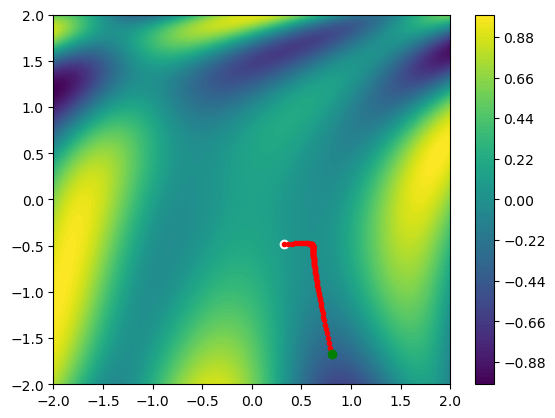

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# Función objetivo para la optimización.
# Esta función es específica y puede variar según el problema.
func = lambda th: np.sin(1/2 * th[0] **2 - 1/4 * th[1] **2 + 3) * np.cos(2 * th[0] + 1 - np.e**th[1])

# Configuración de la resolución de la malla para la visualización.
res = 100
X = np.linspace(-2, 2, res)
Y = np.linspace(-2, 2, res)

# Creación de una matriz de ceros para almacenar los valores de la función.
Z = np.zeros((res, res))

# Cálculo de los valores de la función en los puntos de la malla.
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = func([x, y])

# Visualización de la función como un gráfico de contorno.
plt.contourf(X, Y, Z, 100)
plt.colorbar()

# Generación de un punto aleatorio como posición inicial para el descenso del gradiente.
Theta = np.random.rand(2) * 4 - 2

# Copia de Theta para uso en el cálculo del gradiente.
T = np.copy(Theta)

# Parámetros para el cálculo del gradiente: tamaño del paso y tasa de aprendizaje.
h = 0.001
lr = 0.001

# Representación gráfica del punto inicial.
plt.plot(Theta[0], Theta[1], "o", c="white")

# Inicialización del vector gradiente.
grad = np.zeros(2)

# Proceso iterativo para realizar el descenso del gradiente.
for j in range(10000):
    # Cálculo de las derivadas parciales en cada dimensión.
    for it, th in enumerate(Theta):
        T = np.copy(Theta)
        T[it] = T[it] + h
        deriv = (func(T) - func(Theta)) / h
        grad[it] = deriv

    # Actualización de los parámetros Theta.
    Theta = Theta - lr * grad
    
    # Representación gráfica de la trayectoria cada 100 iteraciones.
    if (j % 100 == 0):
        plt.plot(Theta[0], Theta[1], ".", c="red")

# Representación gráfica de la posición final de Theta.
plt.plot(Theta[0], Theta[1], "o", c="green")
plt.show()


Ahora apliquemos este método del descenso del gradiente al ejemplo inicial de ajustar la recta que pasa por los puntos $(1, 2)$, $(2, 3)$ y $(3, 3.5)$

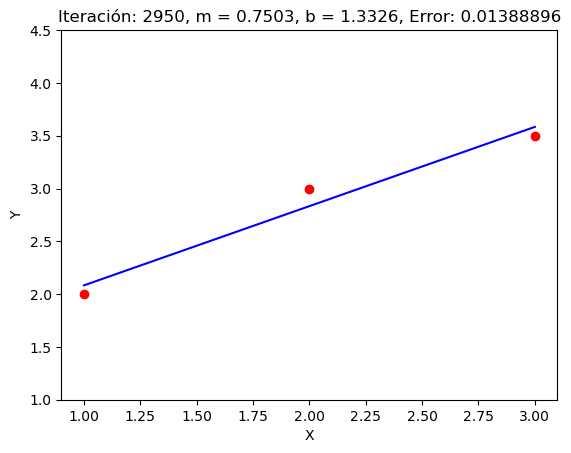

Parámetros finales de la regresión: m = 0.7502714973101723, b = 1.3327161561319572


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Puntos de datos
x = np.array([1, 2, 3])
y = np.array([2, 3, 3.5])

# Establecer límites fijos para el eje Y
ylim_min = min(y) - 1
ylim_max = max(y) + 1

# Función de costo (error cuadrático medio)
def cost_function(m, b, x, y):
    total_error = 0.0
    for i in range(len(x)):
        total_error += (y[i] - (m * x[i] + b))**2
    return total_error / len(x)

# Parámetros iniciales más cercanos a 0
m = np.random.rand() * 0.01
b = np.random.rand() * 0.01

# Tasa de aprendizaje y número de iteraciones
lr = 0.01
n_iterations = 3000

for iteration in range(n_iterations):
    m_grad = 0
    b_grad = 0
    N = float(len(x))
    for i in range(len(x)):
        m_grad += -2/N * x[i] * (y[i] - (m * x[i] + b))
        b_grad += -2/N * (y[i] - (m * x[i] + b))

    m -= lr * m_grad
    b -= lr * b_grad

    if iteration % 50 == 0:
        clear_output(wait=True)
        plt.scatter(x, y, color='red')
        y_pred = m * x + b
        plt.plot(x, y_pred, color='blue')
        plt.ylim(ylim_min, ylim_max)
        error = cost_function(m, b, x, y)
        plt.title(f"Iteración: {iteration}, m = {m:.4f}, b = {b:.4f}, Error: {error:.8f}")
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

# Mostrar los valores finales de m y b
print(f"Parámetros finales de la regresión: m = {m}, b = {b}")


Como podemos observar, los valores obtenidos para $m$ y $b$ utilizando el método del Descenso del Gradiente difieren de aquellos hallados mediante el método de *Mínimos Cuadrados Ordinarios* (*OLS*). Para comprender por qué ocurre esto, es útil analizar el gráfico de la función de costo.

En la regresión lineal, la función de costo suele formar una superficie convexa con un único mínimo global. No obstante, en ciertos casos, puede presentar múltiples mínimos locales, áreas planas o incluso puntos de silla de montar. El algoritmo de *Descenso del Gradiente*, dependiendo del punto de inicio (valores iniciales de $m$ y $b$), podría converger a diferentes mínimos locales. Esto resulta en variaciones en los valores finales de $m$ y $b$. Si experimentamos con distintos valores iniciales para $m$ y $b$, podremos observar cómo cambian los resultados.

A pesar de estas diferencias, es importante notar que las líneas de regresión resultantes de ambos métodos, *Descenso del Gradiente* y *OLS*, suelen ser muy parecidas. Esto indica que, aunque los valores numéricos exactos de los parámetros pueden variar, la tendencia general que describen y su capacidad para modelar la relación entre las variables sigue siendo consistente y fiable.

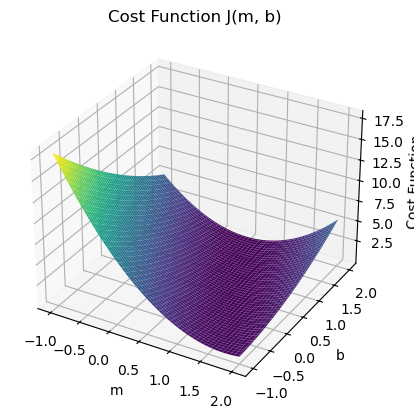

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the data
X = np.array([1, 2, 3])  # Features
y = np.array([2, 3, 3.5])  # Target

# Define the cost function
def cost_function(X, y, m, b):
    n = len(X)
    y_pred = m * X + b
    return (1/(2*n)) * np.sum((y_pred - y)**2)

# Generate values for m and b
m_vals = np.linspace(-1, 2, 100)
b_vals = np.linspace(-1, 2, 100)
M, B = np.meshgrid(m_vals, b_vals)
J_vals = np.array([cost_function(X, y, m, b) for m, b in zip(np.ravel(M), np.ravel(B))])
J_vals = J_vals.reshape(M.shape)

# Plot the cost function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, J_vals, cmap='viridis')
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('Cost Function')
ax.set_title('Cost Function J(m, b)')
plt.show()

#### Desafíos y Consideraciones

- ***Elección de la Tasa de Aprendizaje:*** Una tasa de aprendizaje inadecuadamente elegida puede llevar a una convergencia muy lenta o a una divergencia.
<p>&nbsp;</p>

- ***Problemas de Convergencia:*** El descenso del gradiente puede quedar atrapado en mínimos locales o puntos de silla. Para resolver esto se pueden emplear técnicas avanzadas como momentum o adaptación de la tasa de aprendizaje.
<p>&nbsp;</p>

- ***Escalado de Características:*** El escalado adecuado de características puede acelerar significativamente la convergencia del algoritmo. La Normalización y estandarización son algunas técnicas comunes.

### Otros modelos de Regresión

En el vasto campo de los métodos de regresión, existen numerosas técnicas más allá de las básicas que no cubriremos en detalle en este curso. Entre estas, se destacan métodos avanzados y especializados como la [Regresión Ridge](https://en.wikipedia.org/wiki/Ridge_regression), que incorpora una penalización [L2](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm) para manejar la multicolinealidad; [Lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)), conocida por su capacidad de selección de características a través de la penalización [L1](https://en.wikipedia.org/wiki/Taxicab_geometry); y [Elastic Net](https://en.wikipedia.org/wiki/Elastic_net_regularization), que combina las estrategias de *Ridge* y *Lasso* para ofrecer un enfoque más equilibrado. Además, la [Regresión Polinomial](https://en.wikipedia.org/wiki/Polynomial_regression) nos permite modelar relaciones no lineales entre variables, mientras que los [Mínimos Cuadrados Parciales](https://en.wikipedia.org/wiki/Partial_least_squares_regression) se utilizan cuando se manejan datos con muchas variables correlacionadas. Por otro lado, la [Regresión de Soporte Vectorial](https://en.wikipedia.org/wiki/Support_vector_machine) (*SVR*), una adaptación de las *Máquinas de Soporte Vectorial*, es útil para modelos en espacios de alta dimensionalidad. Cada uno de estos métodos tiene aplicaciones específicas y ventajas en ciertos contextos, abriendo un abanico de posibilidades para el análisis de datos y la modelización predictiva más allá de las técnicas de regresión convencionales.


## Clasificación

<p float="center">
  <img src="https://github.com/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/images/Classification05.jpg?raw=true" width="250" />
</p>

### ¿Cómo funciona?

<p float="center">
  <img src="https://github.com/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/images/Classification03.jpeg?raw=true" width="250" />
</p>

La clasificación nos ayuda a tomar decisiones, por ejemplo, a la hora de recoger tomates en un supermercado ("verdes", "maduros", "podridos"). En términos de aprendizaje automático, asignamos una etiqueta de una de las clases a cada tomate que tenemos en nuestras manos.

La eficiencia en la recolección de tomates (algunos lo llamarían modelo de clasificación) depende de la precisión de sus resultados. Cuanto más a menudo vayas al supermercado (en lugar de enviar a tus padres o a tu pareja), mejor podrás elegir tomates frescos y deliciosos.

Las máquinas son iguales. Para que un modelo de clasificación aprenda a predecir resultados con precisión, necesita muchos ejemplos de entrenamiento.

### Tipos de algoritmos de clasificación

<p float="center">
  <img src="https://github.com/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/images/Classification04.PNG?raw=true" width="750" />
</p>

En el aprendizaje supervisado, la clasificación se refiere al proceso de predecir categorías discretas (etiquetas de clase) para instancias dadas. Existen varios tipos de clasificación, cada uno adecuado para diferentes tipos de problemas y conjuntos de datos. Los principales tipos de clasificación en aprendizaje supervisado son:

### Clasificación Binaria

<p float="center">
  <img src="https://github.com/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/images/Classification03.jpeg?raw=true" width="250" />
</p>

La clasificación binaria significa que hay dos clases con las que trabajar que se relacionan entre sí como *verdaderas* o *falsas*. Imagina que tienes delante una enorme caja con tomates amarillos y rojos, pero para tu receta de pasta italiana solo necesitas los rojos. O en un diagnóstico médico, un clasificador binario para una enfermedad específica podría tomar los síntomas de un paciente como características de entrada y predecir si el paciente está sano o tiene la enfermedad. Los posibles resultados del diagnóstico son *positivos* y *negativos*. 

Veamos algunos de los algoritmos de clasificación binaria más usados:

#### Regresión Logística

La [regresión logística](https://en.wikipedia.org/wiki/Logistic_regression) se utiliza para la clasificación binaria donde empleamos la [función sigmoide](https://en.wikipedia.org/wiki/Sigmoid_function), que toma como entrada las variables independientes y produce un valor de probabilidad entre $0$ y $1$.

Por ejemplo, si tenemos dos clases, `Clase0` y `Clase1`, si el valor de la función logística para una entrada es mayor que $0.5$ (valor umbral), entonces pertenece a la `Clase1`, de lo contrario, pertenece a la `Clase0`. Se le llama regresión porque es una extensión de la regresión lineal, pero se utiliza principalmente para problemas de clasificación.

***Función logística:***

La *función logística*, también conocida como *función sigmoide*, es una función matemática que tiene una característica forma de *"S"*. Es ampliamente utilizada en el campo del aprendizaje automático, especialmente en la regresión logística y en redes neuronales, para modelar la probabilidad de una clase o evento.

1. **Ecuación**: La función logística se define como:

<p float="center">
  <img src="https://github.com/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/images/Logistic00.PNG?raw=true" width="250" />
</p>
cccccc

   $$\sigma(x) = \frac{1}{1 + e^{-x}} $$
   Donde:
   - $\sigma(x)$ es el valor de salida de la función sigmoide.
   - $x$ es el valor de entrada.
   - $e$ es la base del logaritmo natural.

2. **Características**:
- **Rango de Salida**: La salida de la función sigmoide está siempre entre $0$ y $1$, lo que la hace útil para representar probabilidades. Recordemos que la probabilidad de una clase se puede medir como:   
<p>&nbsp;</p>

   $$P(y=1)=\sigma(x)$$  
   $$P(y=0)=1-\sigma(x)$$    
<p>&nbsp;</p>
   
- **Forma de S**: Tiene una región central donde ocurre una transición suave y pronunciada, que se aplana a medida que se aleja hacia cualquier extremo.  
<p>&nbsp;</p>
   
- **Derivada**: La derivada de la función sigmoide es máxima en $x = 0$ y disminuye a medida que $x$ se aleja de $0$, lo cual es útil para el gradiente en algoritmos de aprendizaje.
<p>&nbsp;</p>

3. **Código en Python**

    A continuación, se proporciona un código en Python que utiliza las bibliotecas [`matplotlib`](https://matplotlib.org/) y [`numpy`](https://numpy.org/) para visualizar la función sigmoide logística:

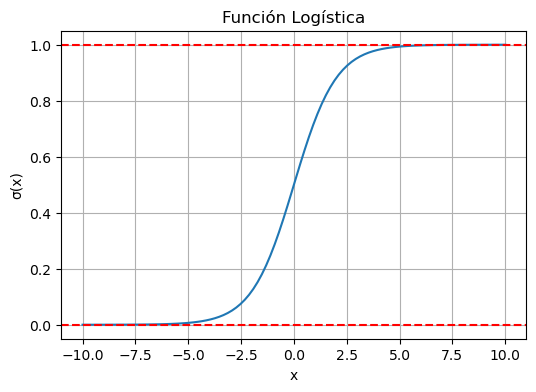

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función logística
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Generación de valores de x
x = np.linspace(-10, 10, 100)

# Calculando los valores y de la función logística
y = logistic(x)

# Creación del gráfico
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.title("Función Logística")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.axhline(0, color='red', linestyle='--')
plt.axhline(1, color='red', linestyle='--')
plt.grid(True)
plt.show()

<div class="alert alert-success" role="alert">
  <strong>Actividad para el estudiante:</strong>
  <p>Investigue otras posibles funciones Sigmoides. Para cada una de ellas, indique su aplicación o ventaja/desventaja respecto a otras funciones.</p> 
</div>

#### Supuestos de regresión logística

- ***Observaciones independientes:*** cada observación es independiente de la otra. lo que significa que no hay correlación entre ninguna variable de entrada.
<p>&nbsp;</p>

- ***Variables dependientes binarias:*** se asume que la variable dependiente debe ser binaria o dicotómica, lo que significa que solo puede tomar dos valores. Para más de dos categorías se utilizan funciones SoftMax.
<p>&nbsp;</p>

- ***Relación de linealidad entre variables independientes y probabilidades logarítmicas:*** la relación entre las variables independientes y las probabilidades logarítmicas de la variable dependiente debe ser lineal.
<p>&nbsp;</p>

- ***Sin valores atípicos (outliers):*** no debería haber valores atípicos en el conjunto de datos.
<p>&nbsp;</p>

- ***Tamaño de muestra grande:*** el tamaño de la muestra es suficientemente grande

##### ¿Cómo funciona la regresión logística?

El modelo de regresión logística transforma la salida de valor continuo de la función de [regresión lineal](https://en.wikipedia.org/wiki/Linear_regression) en una salida de valor categórico utilizando una función sigmoidea, que asigna cualquier conjunto de variables independientes de valor real ingresado a un valor entre $0$ y $1$. Esta función se conoce como función logística.

Sean las características de entrada independientes:

$$
X=\left[\begin{array}{ccc}
x_{11} & \ldots & x_{1 m} \\
x_{21} & \ldots & x_{2 m} \\
\vdots & \ddots & \vdots \\
x_{n 1} & \ldots & x_{n m}
\end{array}\right]
$$

y la variable dependiente es $\mathrm{Y}$ y tiene solo valor binario, es decir, $0$ o $1$.

$$ Y= \begin{cases}0 & \text { if Class } 1 \\ 1 & \text { if Class } 2\end{cases}$$

luego, aplique la función multilineal a las variables de entrada $\mathrm{X}$.

$$z=\left(\sum_{i=1}^n w_i x_i\right)+b$$

Aquí $x_i$ está la $i$-ésima observación de $\mathrm{X}, w_i=\left[w_1, w_2, w_3, \cdots, w_m\right]$ son los pesos o coeficiente, y $b$ es el término de sesgo, también conocido como intersección. simplemente esto se puede representar como el producto escalar del peso y el sesgo.

$$z=w \cdot X+b$$

La discusión anterior es conocida como... *Regresión Lineal*.

#### Evaluación del desempeño

Las métricas de desempeño son esenciales para evaluar y comprender la efectividad de los modelos de clasificación en aprendizaje automático. Cada métrica proporciona una perspectiva única sobre la capacidad del modelo para hacer predicciones correctas y manejar diferentes tipos de errores.

##### Matriz de Confusión

La matriz de confusión es una tabla que organiza las prediciones correctas e incorrectas de un modelo de clasificación, distribuidas en dos dimensiones: las **predicciones** del modelo y las **clases reales**. Es una herramienta útil para evaluar el desempeño de un modelo de clasificación, ya que proporciona una visión detallada de cuántos casos fueron clasificados correctamente y cuántos fueron clasificados de manera incorrecta.

Los componentes básicos de la matriz de confusión son:  

- **Verdaderos Positivos (TP)**: Estos son los casos en los que **el modelo predijo correctamente la clase positiva**. Por ejemplo, si el modelo está identificando spam, serían los correos spam que el modelo identificó correctamente como spam.  
<p>&nbsp;</p>

- **Falsos Positivos (FP)**: Son los casos en los que **el modelo predijo incorrectamente la clase positiva**. Siguiendo con el ejemplo del spam, serían los correos que no son spam, pero que el modelo identificó erróneamente como tal.  
<p>&nbsp;</p>

- **Verdaderos Negativos (TN)**: Son los casos en los que **el modelo predijo correctamente la clase negativa**. En el caso del spam, serían los correos que no son spam y que el modelo identificó acertadamente como no spam.  
<p>&nbsp;</p>

- **Falsos Negativos (FN)**: Son los casos en los que el **modelo no pudo identificar correctamente la clase negativa**. Estos serían los correos que son spam, pero que el modelo no reconoció como tal.  

Se pueden agrupar en una tabla de la siguiente manera:

|                   | Predicción Positiva | Predicción Negativa |
|-------------------|---------------------|---------------------|
| **Clase Positiva** | Verdaderos Positivos (TP) | Falsos Negativos (FN) |
| **Clase Negativa** | Falsos Positivos (FP) | Verdaderos Negativos (TN) |


***Conexión con las métricas de desempeño***
- **Exactitud**: Se calcula directamente de la matriz de confusión como la suma de TP y TN dividida por el total de casos.  
<p>&nbsp;</p>
   
- **Precisión y Sensibilidad (Recall)**: La precisión se calcula utilizando TP y FP, mientras que la sensibilidad se calcula con TP y FN, todos extraídos de la matriz.  
<p>&nbsp;</p>
   
- **Puntuación F1**: Esta puntuación se basa en la precisión y la sensibilidad, que, a su vez, dependen de los valores de la matriz de confusión.  
<p>&nbsp;</p>
   
- La matriz no se utiliza directamente en el cálculo del AUC de la curva ROC, pero proporciona una base para entender cómo las modificaciones en los umbrales de decisión del modelo afectarían a TP, FP, TN y FN.

***Interpretación Más Allá de las Métricas:*** Además de facilitar el cálculo de estas métricas, la matriz de confusión permite una interpretación más rica y detallada del rendimiento del modelo. Por ejemplo, en un contexto donde los falsos negativos son muy costosos (como en la detección de enfermedades graves), una matriz de confusión con un alto número de FN señalaría una necesidad crítica de mejora, incluso si la exactitud general del modelo es alta.


##### Exactitud (Accuracy)

La exactitud es frecuentemente la primera métrica que se considera en la clasificación. Aunque es intuitiva, su eficacia es limitada, especialmente en conjuntos de datos desbalanceados. Por ejemplo, en una situación donde el 95% de los ejemplos son de una clase, un modelo que siempre predice esa clase alcanzaría una exactitud del 95%, lo cual sería engañoso. Mejor utilizada cuando las clases están equilibradamente distribuidas y los costos de los errores de clasificación son similares entre clases.

La exactitud es como el "promedio general" en el reporte de calificaciones de un modelo de clasificación. Es una métrica inicial, proporcionando una vista panorámica del rendimiento del modelo. Sin embargo, su eficacia es limitada en situaciones de clases desequilibradas - piensa en un modelo que predice el clima en un desierto y siempre dice 'soleado'. Aunque tendrá una alta exactitud, no es muy útil para los días raros pero críticos cuando llueve.

Su representación matemática es:

$$ \text{Exactitud} = \frac{\text{Número de predicciones correctas (TP + TN)}}{\text{Total de predicciones (TP + FP + FN + TN)}} $$

##### Precisión y Sensibilidad

La precisión y la sensibilidad nos ofrecen una visión más matizada:

- **Precisión**: Indica cuántas de las predicciones clasificadas como positivas son realmente positivas. Es como verificar la calidad de un filtro; por ejemplo, en un filtro de spam, queremos saber: "De todos los correos marcados como spam, ¿cuántos realmente eran spam?" 

  $$ \text{Precisión} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$  

- **Sensibilidad (Recall)**: Muestra cuántos de los casos positivos reales el modelo es capaz de captar. En el mismo contexto de un filtro de spam, sería: "De todos los correos que son realmente spam, ¿cuántos hemos identificado?"  

  $$ \text{Sensibilidad} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

Estas dos métricas son particularmente valiosas cuando los costos de los falsos positivos y falsos negativos son diferentes. Por ejemplo, en un sistema de diagnóstico médico, un falso negativo (no detectar una enfermedad real) puede ser mucho más grave que un falso positivo.

##### Puntuación F1

La puntuación F1 es como un mediador entre precisión y sensibilidad. No basta con ser bueno en uno y malo en el otro; el F1 Score busca un equilibrio. Su cálculo, al ser el promedio armónico, tiende a penalizar más los desequilibrios extremos entre precisión y sensibilidad.

$$ \text{F1} = 2 \times \frac{\text{Precisión} \times \text{Sensibilidad}}{\text{Precisión} + \text{Sensibilidad}} $$

Este equilibrio es vital en muchos sistemas de clasificación donde tanto evitar falsos positivos como detectar todos los positivos son importantes.


##### Curva ROC y AUC

<p float="center">
  <img src="https://github.com/carlosalvarezh/EstructuraDatosAlgoritmos2/blob/main/images/AUC.webp?raw=true" width="250" />
</p>

La Curva ROC y el AUC proporcionan una visión integral de cómo se comporta el modelo a través de diferentes umbrales, permitiéndonos entender su capacidad para distinguir entre clases. La Curva ROC es un gráfico de la sensibilidad contra 1 - especificidad (tasa de falsos positivos) para diferentes puntos de corte.

El AUC (Area Under the Curve), es como medir el área total bajo una curva en cálculo. Un AUC de 1 significa un modelo perfecto; un AUC de 0.5, no mejor que el azar. Es como darle a tu modelo una "prueba de estrés" para ver cómo se comporta en diferentes niveles de decisión.
